# **Lab 2: Random Simulation Solutions**

In this lab, you will learn how to compare an observed proportion to one expected by chance.

Note: Just as re-starting the worksheet was useful in Sage in LS 30A, re-starting the kernel is useful for debugging in Python notebooks. You can do this by going to Kernel menu > Re-start Kernel.

In [1]:
# 1. To make the necessary tools available, run the following code.
%matplotlib inline 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In the 1970s, the town of Woburn, MA seemed to have too many childhood leukemia cases. 12 children had been diagnosed between 1969 and 1979, and some parents started to suspect that something in the environment might be to blame. (This story was described in the book _A Civil Action_ by Jonathan Harr, which was later made into a movie. There is also an [epidemiology tutorial from Boston University](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH/Woburn/) based on this case.)

The first step in investigating a potential disease cluster such as this is to see if there really are more cases than what would be expected by chance. In this lab, we will do this for childhood leukemia in Woburn by comparing the proportion of Woburn children who got sick to the proportion in the country as a whole, which is about 4/10000.

**Exercise 2**. If there was nothing unusual going on in Woburn, what could we say about these proportions? This is our null hypothesis. (Double-click this cell or make a new text cell to type in your answer.)

TO DO 

If there is nothing unusual happening in Woburn, the proportion of children with leukemia should be the same as the proportion of children with leukemia in the country as a whole.

**BOX MODEL**

First, we will need to set up a list in which the number of people with and without leukemia is the same as in the general population. To avoid typing a very long list, we will use a cool Python trick for making a list of repeating elements. If there are 20 people, of which 18 are healthy and 2 have leukemia, we would type `leu = [“H”]*18+[“L”]*2. `

In [3]:
# 3. Make a list of 10,000 people representing the general population, for which the childhood leukemia rate is 4/10000. You can use "L" for "leukemia" and "H" for "healthy".

leu = ["H"]*9996+["L"]*4 
#leu

We will now start using a powerful tool for working with data, the Numpy array. Numpy arrays are objects that look like lists or tables but have special features that are helpful for scientific computing. To convert a list to a 1-D Numpy array, use the function `np.array` and input the list.

In [4]:
# 4. Turn your list into a Numpy array. Make sure to assign it to a variable for future use.

leuarr = np.array(leu)


In 1970, there were 11,748 children ages 0-14 in Woburn. We will now investigate the hypothesis that the 12 who got sick are a random sample of the general population. To do this, we will take random samples of 11,748 people from the general population and find how many in each sample have leukemia. We will then compare the observed results to the simulated ones.

We need to pick as many individuals from the box as there are children in Woburn. If there are 20 children, we would use 

`p_leulist = np.random.choice(leuarr, 20)`

The p_ is an abbreviation for “pseudo”. It distinguishes our simulation results from the real data.

In [5]:
# 5. Pick a random sample of 11,748 people from the general population.

p_leulist = np.random.choice(leuarr, 11748)

 To count the children with leukemia, we can look at each individual and record whether or not they have leukemia (True for yes, False for no). This done by writing a comparison with the whole array, as in `arr1<20` or `arr2=="dog"`.  (This syntax only works for Numpy arrays, not lists, which is why we are using arrays.) The output is an array of Boolean (True or False) values.  We can then apply the `sum` function to this array to get a total number of unvaccinated individuals.


In [6]:
# 6. Do this for your random sample.

leunum = np.sum(p_leulist == "L")
leunum

5

We now have a single result from a random simulation. But in order to compare our observed result to what might occur if the null hypothesis is true, we need many simulated results.

**Exercise 7**. Briefly explain why.

We therefore need to repeat our simulation many times. (We'll usually do 10,000.) To do this, we'll use a *for loop*. For loops have many powerful and elegant uses in Python, but for now, we only need the most basic one — repeating an action. To run some code *n* times, you'll need to write

```
for i in range(n):
    #Code to be repeated
```

For example, the following code prints “Hello, world!” 5 times.


```
for i in range(5):
    print(“Hello, world!”)
```

Running your code just a few times is a good way to debug it before you run it thousands of times.

In [6]:
# 8. Put your code for simulating the Woburn leukemia cases in a for loop that will run it 10 times. Print the result each time.


for i in range(10):
    p_leulist = np.random.choice(leuarr, 11748)
    p_leunum = np.sum(p_leulist == "L") 
    print(p_leunum)



5
9
8
4
8
6
5
3
6
6


In order to do anything useful with our simulation output, we will need to store it somewhere. This can be done by making an empty list — one with no elements — and appending each result to it. (Think of making an empty list as tearing out a piece of paper and titling it “Groceries” when making a shopping list.) To make empty list, enter `listname = []`, replacing `listname` with the actual name of your list. Then, use `listname.append()` to add computed values to your list.


**Exercise 9**. Why does the empty list need to be created before the for loop rather than inside it?



In [7]:
# 10. Make an empty list to hold your simulation output. Then, use a for loop to run your simulation 10000 times. 
# HINT: Make sure you are storing the number of individuals with leukemia, not the whole simulation output.
mylist = []
for i in range(10000):
    p_leulist = np.random.choice(leuarr, 11748)
    p_leunum = np.sum(p_leulist == "L")
    mylist.append(p_leunum)


Now, we want to make a histogram of the simulation results. As before, we will use the seaborn function `displot`. If our simulation output is in `simlist`, the plotting code is: 

```
p=sns.displot(data=simlist)
p.set(xlabel="Some Characteristic", ylabel="Count")
```



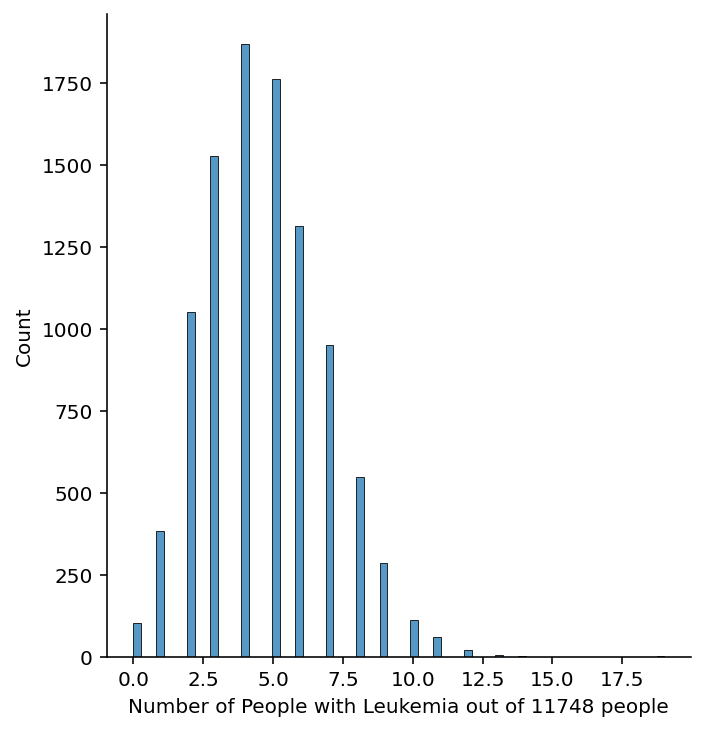

In [19]:
# 11. Make such a plot for your simulation.
p=sns.displot(data=mylist)
p.set(xlabel="Number of People with Leukemia out of 11748 people", ylabel="Count")

To visually compare the real data to the simulated results, we can put a vertical line at the observed count. In order to do this, we will use the library Pyplot, which we imported earlier with the code `import matplotlib.pyplot as plt`. For example, to put a red vertical line at 10, the code is `plt.axvline(10, color="red")`. This code should go in the same cell as the code for the histogram.


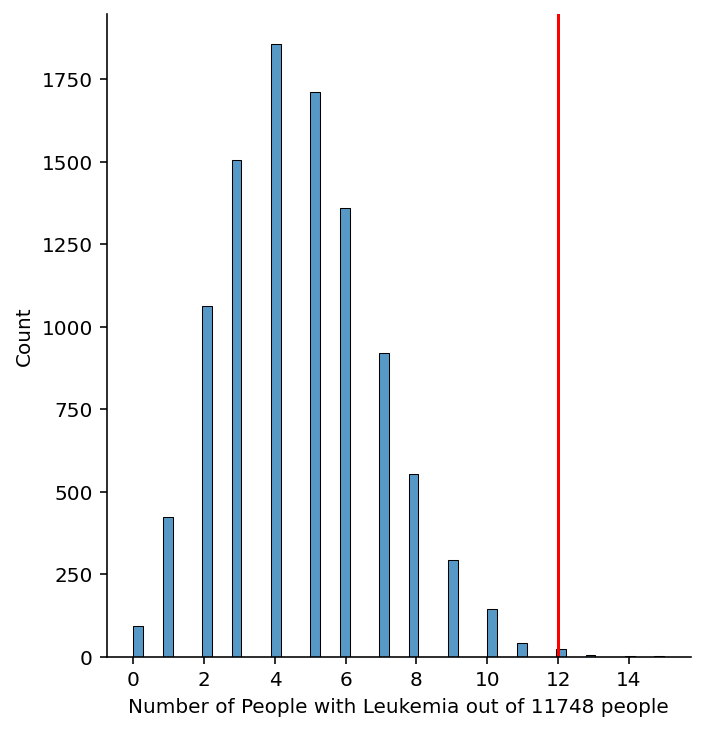

In [9]:
# 12. Add such a line to your histogram.
p=sns.displot(data=mylist)
p.set(xlabel="Number of People with Leukemia out of 11748 people", ylabel="Count")
plt.axvline(12, color="red")

We can also compare the observed result to the simulated ones numerically. The fraction of simulated results that are at least as extreme as the observed one is called the *p-value* of the result.

In [10]:
# 13. Using Python, count how many results are as large as or larger than the observed one. (You can use the >= symbol to do this.)

simarr = np.array(mylist)
np.sum(simarr >= 12)


32

In [11]:
# 14. Find the p-value associated with your result. HINT: How do you go from a count to a fraction?

pval = np.sum(simarr >= 12)/10000
pval

# Based on the 10000 simulations of our null hypothesis, if it were the case that vaccinated and unvaccinated individuals get sick with the same probability, there is an estimated 0.0034% chance that we would have seen our result of 12 children getting leukemia.

0.0032

**Exercise 15**. Write a sentence explaining what your p-value means.



0.0029

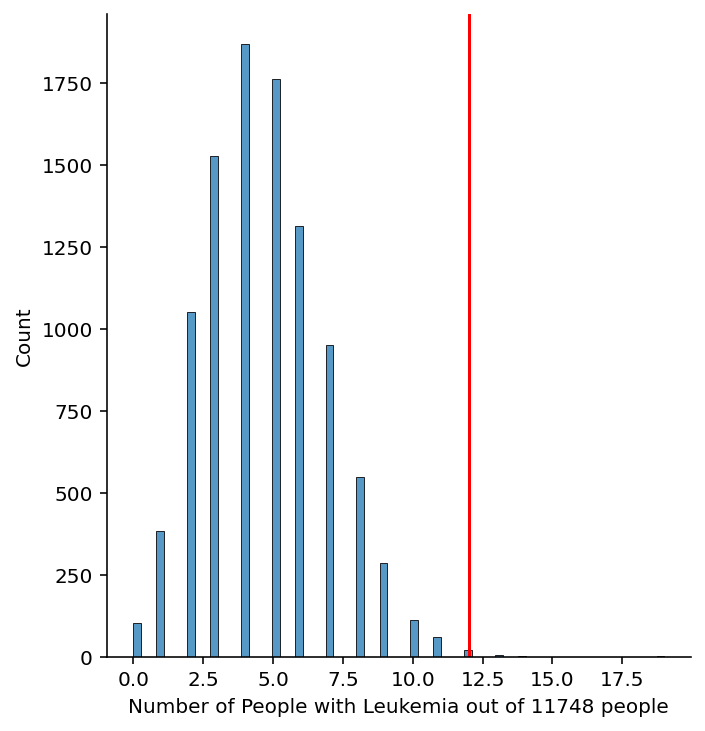

In [17]:
# 16. Put all the important steps of what you have done up to now into a single script. 
# Add enough comments so you'll know in the future what each part of the code does.


# import packages to use plotting and arrays
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

leu = ["H"]*9996+["L"]*4 # set up underlying distribution of vaccinated people in general population
leuarr = np.array(leu) # convert to numpy array

# run 10000 simulations
mylist = []
for i in range(10000):
    p_leulist = np.random.choice(leuarr, 11748)
    p_leunum = np.sum(p_leulist == "L")
    mylist.append(p_leunum)

# plot histogram of simulations and the observed result
p=sns.displot(data=mylist, kde=False)
p.set(xlabel="Number of People with Leukemia out of 11748 people", ylabel="Count")
plt.axvline(12, color="red")

# compute p value by dividing how many simulations resulted in at least 49 unvaccinated people getting sick by total number of simulations
simarr = np.array(mylist)
pval = np.sum(simarr >= 12)/10000
pval




